In [46]:

import keras
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import BatchNormalization
from keras.preprocessing.image import array_to_img, img_to_array, list_pictures, load_img
from keras.callbacks import EarlyStopping

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
from PIL import Image
import os, glob
import random, math

In [47]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [48]:

df = pd.read_csv("data_all.csv")
# df.head()

x, t = [], []

for (i, row) in df.iterrows():
    filepath = row['filepath']
    tmp_img = load_img(filepath, target_size=(32,32))
    img = img_to_array(tmp_img) / 255.0 # -> float32 + 正規化
    
    # データに追加
    x.append(img)
    t.append(row['label'])
    
# numpyに変換
x = np.array(x, 'f')

# x.shape

# クラスの形式を変換 <- one-hot表現
t = np_utils.to_categorical(t, 2)

# 学習用データとテストデータ
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.2, random_state=1)




In [66]:
# CNNを構築
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))       # クラスは2個
model.add(Activation('softmax'))

# コンパイル
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])



In [67]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(x_train)

early_stopping = EarlyStopping(monitor='val_loss', patience=20 , verbose=1, mode="auto")

history = model.fit_generator(datagen.flow(x_train, t_train, batch_size=10),
                              epochs=50,
                              verbose=1,
                              validation_data=(x_test,t_test),
                              callbacks=[early_stopping])

Epoch 1/50
99/99 [==============================] - 10s 101ms/step - loss: 1.3077 - acc: 0.5647 - val_loss: 0.6822 - val_acc: 0.5935
Epoch 2/50
99/99 [==============================] - 9s 91ms/step - loss: 0.6793 - acc: 0.6111 - val_loss: 0.6850 - val_acc: 0.5569
Epoch 3/50
99/99 [==============================] - 9s 93ms/step - loss: 0.6562 - acc: 0.6106 - val_loss: 0.6873 - val_acc: 0.5122
Epoch 4/50
99/99 [==============================] - 9s 90ms/step - loss: 0.6328 - acc: 0.6576 - val_loss: 0.6866 - val_acc: 0.5610
Epoch 5/50
99/99 [==============================] - 9s 92ms/step - loss: 0.6410 - acc: 0.6404 - val_loss: 0.6833 - val_acc: 0.5691
Epoch 6/50
99/99 [==============================] - 9s 90ms/step - loss: 0.6353 - acc: 0.6419 - val_loss: 0.6839 - val_acc: 0.5732
Epoch 7/50
99/99 [==============================] - 9s 92ms/step - loss: 0.6474 - acc: 0.6369 - val_loss: 0.6867 - val_acc: 0.5528
Epoch 8/50
99/99 [==============================] - 9s 92ms/step - loss: 0.6429 -

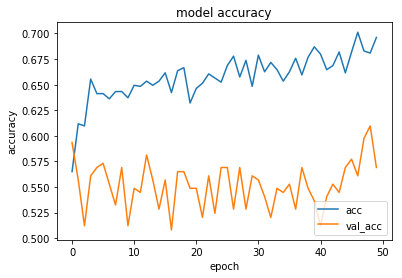

In [68]:

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.show()

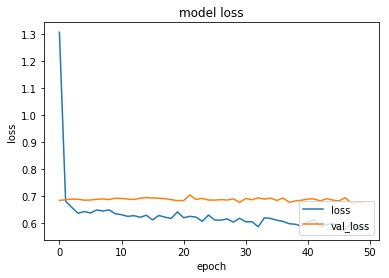

In [69]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'], loc='lower right')
plt.show()

In [70]:
model.evaluate(x_test,t_test)

246/246 [==============================] - 0s 562us/step


[0.675447731967864, 0.5691056900877294]